#### To build a model using a convolutional neural network that can classify lung infection in a person using medical imagery

### 1.	Import the necessary libraries

In [1]:
#Import the necessary libraries:

import os
import cv2
import glob
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout,Flatten, BatchNormalization, MaxPooling2D,Concatenate,Reshape,Activation

## 2.	Plot the sample images for all the classes 

In [2]:
#Importing the required data image
#Dataset contains 3 classes

Healthy Image
Height of Image: 1443 pixels
Width of Image:  1852 pixels
Depth of Image:  3 colors components


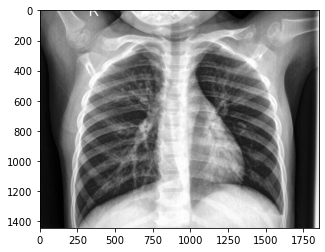

In [3]:
healthy_img=cv2.imread(r"C:\Users\ANBU NAMBI\Desktop\Computer Vision\Project\data\train\Healthy\063.jpeg")
plt.imshow(healthy_img)
print("Healthy Image")
print('Height of Image:', int(healthy_img.shape[0]), 'pixels')
print('Width of Image: ', int(healthy_img.shape[1]), 'pixels')
print('Depth of Image: ', int(healthy_img.shape[2]), 'colors components')

Type-1 Disease Image
Height of Image: 1552 pixels
Width of Image:  1726 pixels
Depth of Image:  3 colors components


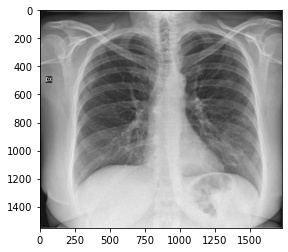

In [4]:
type1_img=cv2.imread(r"C:\Users\ANBU NAMBI\Desktop\Computer Vision\Project\data\train\Type 1 disease\09.png")
plt.imshow(type1_img)
print("Type-1 Disease Image")
print('Height of Image:', int(type1_img.shape[0]), 'pixels')
print('Width of Image: ', int(type1_img.shape[1]), 'pixels')
print('Depth of Image: ', int(type1_img.shape[2]), 'colors components')

Type-2 Disease Image
Height of Image: 968 pixels
Width of Image:  1528 pixels
Depth of Image:  3 colors components


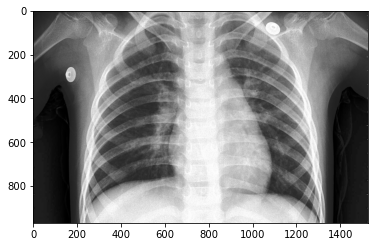

In [5]:
type2_img=cv2.imread(r"C:\Users\ANBU NAMBI\Desktop\Computer Vision\Project\data\train\Type 2 disease\036.jpeg")
plt.imshow(type2_img)
print("Type-2 Disease Image")
print('Height of Image:', int(type2_img.shape[0]), 'pixels')
print('Width of Image: ', int(type2_img.shape[1]), 'pixels')
print('Depth of Image: ', int(type2_img.shape[2]), 'colors components')

## 3.	Plot the distribution of images across the classes

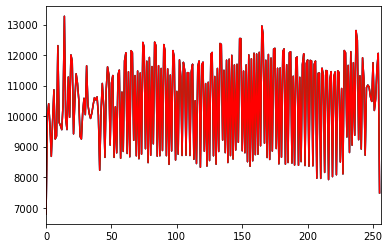

In [6]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([healthy_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

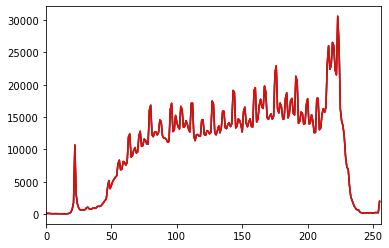

In [7]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([type1_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

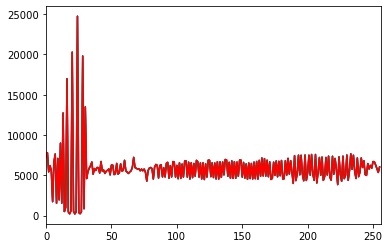

In [8]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([type2_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## 4.	Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

In [9]:
train_datagen = ImageDataGenerator(
rescale =48,rotation_range=90,horizontal_flip=True
)

## 5.	Build a data augmentation for test data to create new data and rescale the image at 48x48

In [10]:
test_datagen = ImageDataGenerator(
rescale =48)

## 6.	Read images directly from the train folder and test folder using the appropriate function

In [11]:
train_data_dir=path = "C:/Users/ANBU NAMBI/Desktop/Computer Vision/Project/data/train"
img_height = 48
img_width = 48
batch_size = 128

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=48,
    vertical_flip =True,
    horizontal_flip=True) 

train= train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size) 

train_gray= train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale') 

print("Train Classes: ",train.class_indices)

Found 251 images belonging to 3 classes.
Found 251 images belonging to 3 classes.
Train Classes:  {'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}


In [12]:
test_data_dir=path = "C:/Users/ANBU NAMBI/Desktop/Computer Vision/Project/data/test"
img_height = 48
img_width = 48
batch_size = 128

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=48)

test = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size) 

test_gray = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale') 

print("Train Classes: ",test.class_indices)

Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Train Classes:  {'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}


## CNN-Architecture

In [13]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (48,48,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
# Output layer with 3 class outcomes
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
esp = EarlyStopping(monitor='val_loss',patience=5,verbose=0,min_delta=0.02)

In [14]:
model_gray = Sequential()
model_gray.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (48,48,1)))
model_gray.add(BatchNormalization())
model_gray.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_gray.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_gray.add(Dropout(0.1))
model_gray.add(Flatten())
model_gray.add(Dense(units = 128 , activation = 'relu'))
model_gray.add(Dropout(0.2))
# Output layer with 3 class outcomes
model_gray.add(Dense(3, activation='softmax'))

model_gray.compile(optimizer = "rmsprop" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
esp = EarlyStopping(monitor='val_loss',patience=5,verbose=0,min_delta=0.02)

In [15]:
history=model.fit_generator(train,epochs=10,validation_data=train,callbacks=[esp])

C:\Users\ANBUNA~1\AppData\Local\Temp/ipykernel_27164/2649132707.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train,epochs=10,validation_data=train,callbacks=[esp])


Epoch 1/10
2/2 [==============================] - 15s 12s/step - loss: 26.2425 - accuracy: 0.3426 - val_loss: 347.8795 - val_accuracy: 0.4422
Epoch 2/10
2/2 [==============================] - 12s 9s/step - loss: 23.5967 - accuracy: 0.4900 - val_loss: 11.9295 - val_accuracy: 0.6295
Epoch 3/10
2/2 [==============================] - 12s 9s/step - loss: 1.7121 - accuracy: 0.7211 - val_loss: 3.1642 - val_accuracy: 0.7092
Epoch 4/10
2/2 [==============================] - 12s 9s/step - loss: 0.6484 - accuracy: 0.8008 - val_loss: 1.6791 - val_accuracy: 0.7610
Epoch 5/10
2/2 [==============================] - 12s 9s/step - loss: 0.4692 - accuracy: 0.8486 - val_loss: 1.0177 - val_accuracy: 0.8167
Epoch 6/10
2/2 [==============================] - 12s 9s/step - loss: 0.4721 - accuracy: 0.8486 - val_loss: 0.8209 - val_accuracy: 0.8327
Epoch 7/10
2/2 [==============================] - 12s 9s/step - loss: 0.3769 - accuracy: 0.8805 - val_loss: 1.0493 - val_accuracy: 0.8008
Epoch 8/10
2/2 [============

In [17]:
history_gray=model_gray.fit_generator(train_gray,epochs=10,validation_data=train_gray,callbacks=[esp])

C:\Users\ANBUNA~1\AppData\Local\Temp/ipykernel_27164/3252991992.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_gray=model_gray.fit_generator(train_gray,epochs=10,validation_data=train_gray,callbacks=[esp])


Epoch 1/10
2/2 [==============================] - 17s 13s/step - loss: 31.1893 - accuracy: 0.3825 - val_loss: 492.2590 - val_accuracy: 0.2789
Epoch 2/10
2/2 [==============================] - 13s 10s/step - loss: 33.4869 - accuracy: 0.3705 - val_loss: 20.1336 - val_accuracy: 0.4940
Epoch 3/10
2/2 [==============================] - 13s 10s/step - loss: 2.8205 - accuracy: 0.6653 - val_loss: 1.1324 - val_accuracy: 0.8406
Epoch 4/10
2/2 [==============================] - 13s 10s/step - loss: 0.7563 - accuracy: 0.8367 - val_loss: 0.6995 - val_accuracy: 0.8805
Epoch 5/10
2/2 [==============================] - 13s 10s/step - loss: 0.5241 - accuracy: 0.8566 - val_loss: 0.9522 - val_accuracy: 0.8367
Epoch 6/10
2/2 [==============================] - 13s 10s/step - loss: 0.5351 - accuracy: 0.8685 - val_loss: 1.8126 - val_accuracy: 0.7689
Epoch 7/10
2/2 [==============================] - 13s 10s/step - loss: 0.7434 - accuracy: 0.8048 - val_loss: 2.6448 - val_accuracy: 0.7331
Epoch 8/10
2/2 [======

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 flatten (Flatten)           (None, 36864)             0

In [19]:
model_gray.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 36864)            

Text(0, 0.5, 'Accuracy')

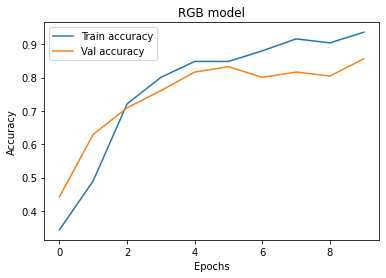

In [20]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="Val accuracy")
plt.title("RGB model")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

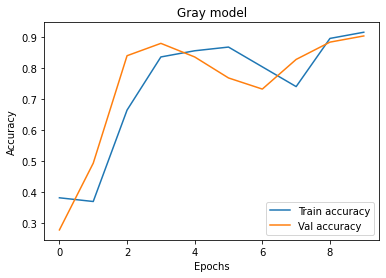

In [21]:
plt.plot(history_gray.history['accuracy'],label="Train accuracy")
plt.plot(history_gray.history['val_accuracy'],label="Val accuracy")
plt.title("Gray model")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [22]:
print("Colored image model")
test_imgs, test_labels = next(train)
res= model.predict(test_imgs)
result = np.argmax(res,axis=1)
result= to_categorical(result)
print(classification_report(y_true=test_labels, y_pred=result))

Colored image model
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        40
           1       1.00      0.89      0.94        55
           2       1.00      0.64      0.78        33

   micro avg       0.86      0.86      0.86       128
   macro avg       0.90      0.84      0.85       128
weighted avg       0.90      0.86      0.86       128
 samples avg       0.86      0.86      0.86       128



In [24]:
print("gray image model")
test_imgs, test_labels = next(train_gray)
res= model_gray.predict(test_imgs)
result = np.argmax(res,axis=1)
result= to_categorical(result)
print(classification_report(y_true=test_labels, y_pred=result))

gray image model
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       0.98      0.96      0.97        50
           2       0.97      0.75      0.85        44

   micro avg       0.89      0.89      0.89       123
   macro avg       0.89      0.90      0.89       123
weighted avg       0.92      0.89      0.90       123
 samples avg       0.89      0.89      0.89       123

